# Project 4C: Kpop Group Lifespan Analysis

### Overall Contents:
- Background
- Data Cleaning
- Exploratory Data Analysis
- [Modeling 1 Logistic Regression](#4.-Modeling-1-Logistic-Regression) **(In this notebook)**
- Evaluation
- Conclusion and Recommendation

### Data Dictionary



## Modeling

As this project aims to develop a model that....

## 4. Modeling: Logistic Regression

### 4.1 Libraries Import

In [107]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 4.2 Data Import

In [63]:
# Import data of train_df_model and test_df_model
train_df = pd.read_csv('../data/disband_train.csv')
test_df = pd.read_csv("../data/active_test.csv")

In [64]:
train_df.head()

,group_name,company,group_type,debute_year,disband_year,social_accounts,inactive_members,current_members,original_members_remainding,initial_members,...,other_singles,foreign_albums,foreign_mini_albums,foreign_other_album,foreign_singles,foreign_digital_singles,others,last_production_year,total_releases,lifespan
0,10X10,gaon_entertainment,0,2015,2016,2,0,6,6,6,...,0,0,0,0,0,0,0,2016,3,2
1,1NB,trivus_entertainment,0,2017,2018,4,0,5,5,5,...,0,0,0,0,0,0,0,2018,6,2
2,1PS,maroo_entertainment,0,2014,2015,3,0,5,4,4,...,0,0,0,0,0,0,1,2014,2,2
3,2EYES,sidushq,0,2013,2017,2,0,4,4,5,...,0,0,0,0,0,0,1,2015,2,5
4,2NE1,yg_entertainment,0,2009,2017,5,0,3,3,4,...,0,2,1,0,2,2,1,2017,26,9


In [65]:
test_df.head()

,group_name,company,group_type,debute_year,disband_year,social_accounts,inactive_members,current_members,original_members_remainding,initial_members,...,digital_singles,other_singles,foreign_albums,foreign_mini_albums,foreign_other_album,foreign_singles,foreign_digital_singles,others,last_production_year,total_releases
0,(G)I-DLE,cube_entertainment,0,2018,0,10,1,5,5,6,...,4,0,0,2,0,2,2,5,2021,20
1,3YE,gh_entertainment,0,2019,0,5,0,3,3,3,...,4,1,0,0,0,0,0,0,2021,6
2,4CARAT,youngbridge_entertainment,0,2019,0,1,0,3,3,4,...,2,0,0,0,0,0,0,0,2020,2
3,A-Daily,dk_entertainment,0,2014,0,4,0,2,2,6,...,3,0,0,0,0,0,0,1,2017,5
4,A-Feel,sa_entertainment,0,2019,0,2,0,4,4,4,...,1,0,0,0,0,0,0,0,2019,1


### 4.3 Set the X and y variable

In [66]:
X = train_df.drop(labels = ['group_name','company','disband_year','foreign_digital_singles','lifespan'], axis = 1)
y = train_df.disband_year

In [67]:
X_test = test_df.drop(labels = ['group_name','company','disband_year','foreign_digital_singles'], axis = 1)

### 4.4 Multicollinearity
As mentioned in our EDA section we suspect that there might be multicollinearity effect present. Therefore we will use a polynomial feature of 2 to model our data as well.

In [68]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_poly = poly.fit_transform(X)

### 4.4 Split the data into train/val data

In [69]:
# Perform a train, val split on the data on the resampled data (normal)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)

# Perform a train, val split on the data on the resampled data (polynomialfeature)
X_poly_train, X_poly_val, y_poly_train, y_poly_val = train_test_split(X_poly, y, test_size=.25, random_state=42)

### 4.5 OLS model

In [70]:
ols = LinearRegression()
ols.fit(X_train, y_train)
# the model score on the training and test data
print(ols.score(X_train, y_train))
print(ols.score(X_val, y_val))

0.9696854348939196
0.9599667979136057


In [71]:
ols = LinearRegression()
ols.fit(X_poly_train, y_poly_train)
# the model score on the training and test data
print(ols.score(X_poly_train, y_poly_train))
print(ols.score(X_poly_val, y_poly_val))

0.9920197572450795
-13.753087862509897


We see that although the score is better on the training data, when it come to the test data it performed poorly. Its a classic case of overfitting. Therefore we will be using the normal features to create our model.

### 4.6 Lasso Regression


In [72]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-5, 5, 1000)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
# Fit model using best ridge alpha!
lasso_cv = lasso_cv.fit(X_train, y_train)

In [73]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.25966559729348726

In [74]:
print(f'R-squared for train is : {lasso_cv.score(X_train, y_train)}')
print(f'R-squared for val is : {lasso_cv.score(X_val, y_val)}')

R-squared for train is : 0.9631039192749785
R-squared for val is : 0.9627661008988121


In [90]:
lasso_pred = lasso_cv.predict(X_val)

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


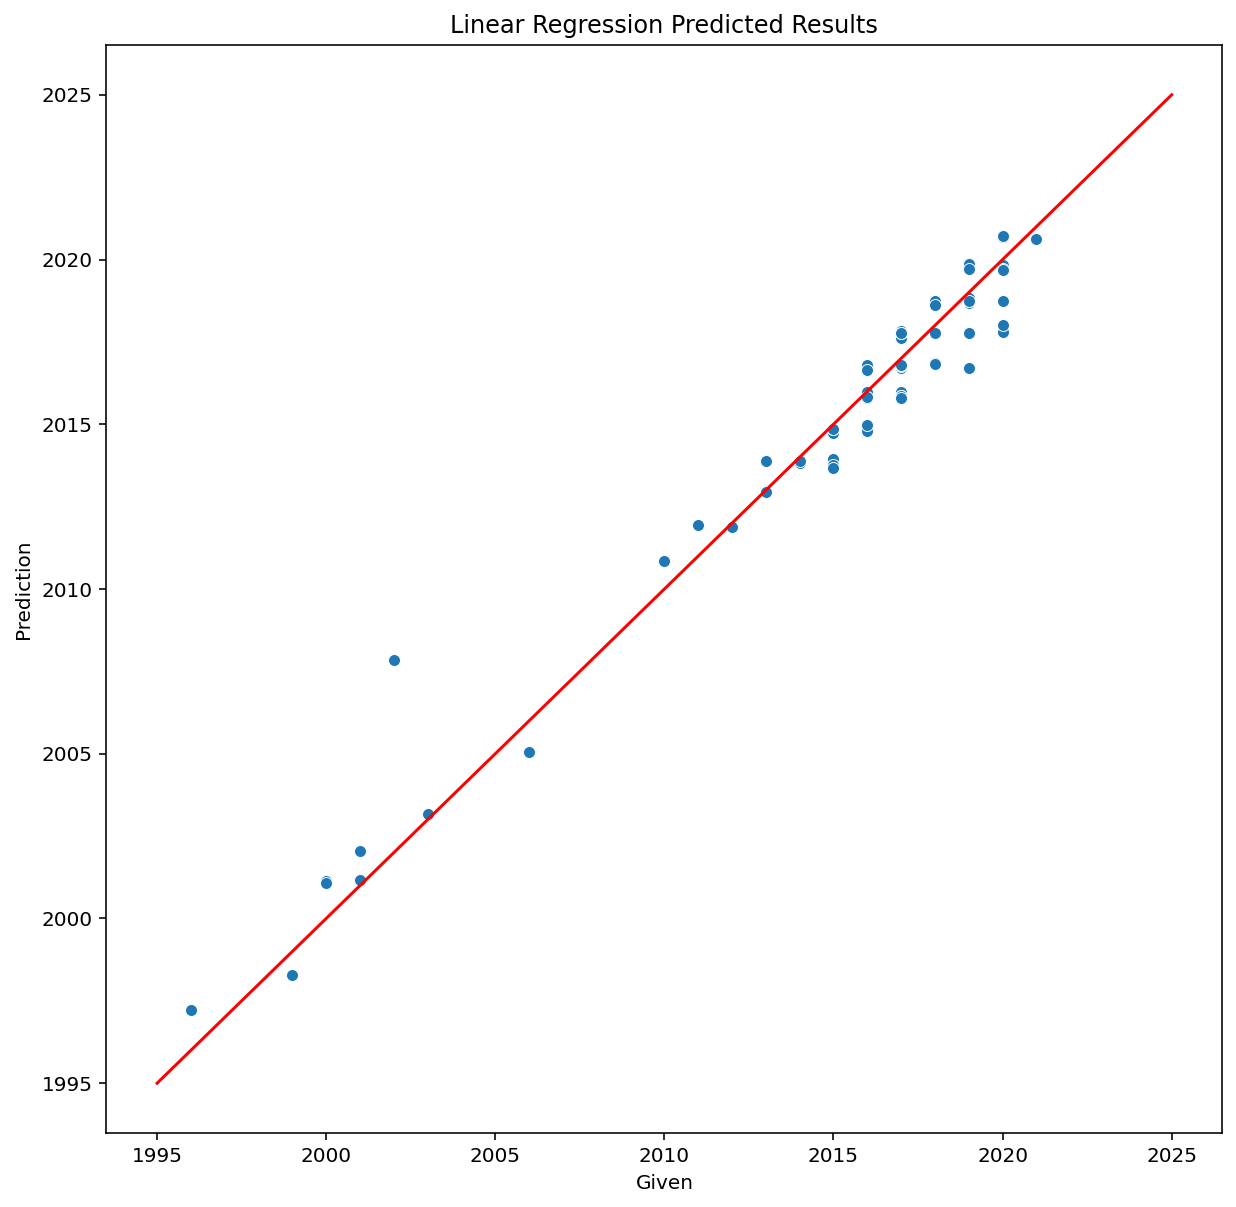

In [97]:
# plot the model
plt.figure(figsize=(10,10))
plot = sns.scatterplot(y_val, lasso_pred);
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(1995,2025,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.title("Lasso Regression Predicted Results");
#plt.savefig("../",dpi=300,bbox_inches='tight')

<AxesSubplot:title={'center':'Lasso Regression Coef Values'}>

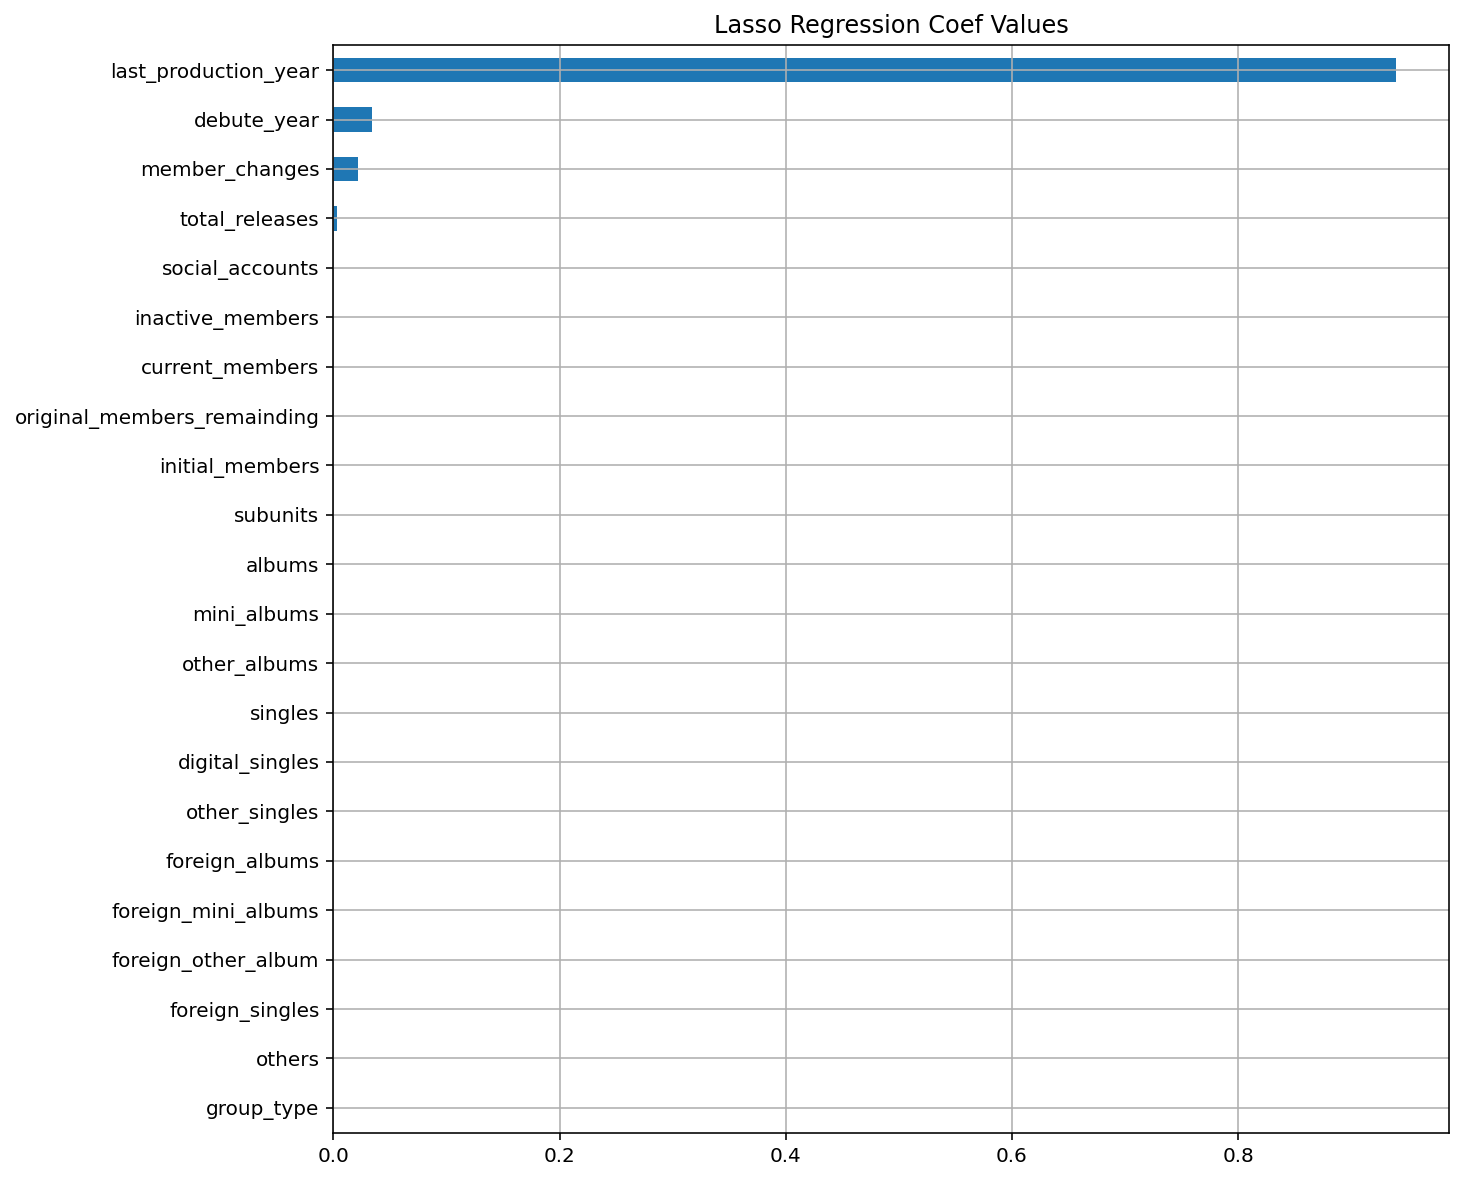

In [104]:
features = X.columns
coef = pd.Series(lasso_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='Lasso Regression Coef Values',figsize=(10,10), grid = True)
#plt.savefig("../",dpi=300,bbox_inches='tight')

### 4.6 Ridge Regression



In [78]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(-5, 5, 1000)
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
# Fit model using best ridge alpha!
ridge_cv = ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-05, 1.02331658e-05, 1.04717682e-05, 1.07159340e-05,
       1.09657929e-05, 1.12214777e-05, 1.14831241e-05, 1.17508713e-05,
       1.20248614e-05, 1.23052400e-05, 1.25921561e-05, 1.28857621e-05,
       1.31862140e-05, 1.34936714e-05, 1.38082977e-05, 1.41302599e-05,
       1.44597292e-05, 1.47968806e-05, 1.51418933e-05, 1.54949504e-05,
       1.58562396e-05, 1.62259529e-0...
       5.88531578e+04, 6.02254120e+04, 6.16296626e+04, 6.30666554e+04,
       6.45371540e+04, 6.60419396e+04, 6.75818117e+04, 6.91575883e+04,
       7.07701066e+04, 7.24202233e+04, 7.41088152e+04, 7.58367791e+04,
       7.76050334e+04, 7.94145172e+04, 8.12661920e+04, 8.31610415e+04,
       8.51000725e+04, 8.70843150e+04, 8.91148232e+04, 9.11926760e+04,
       9.33189772e+04, 9.54948564e+04, 9.77214697e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [79]:
# Here is the optimal value of alpha
ridge_cv.alpha_

9.461848194721993

In [80]:
print(ridge_cv.score(X_train, y_train))
print(ridge_cv.score(X_val, y_val))

0.9683028394201807
0.9631474284113906


In [99]:
ridge_pred = ridge_cv.predict(X_val)

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


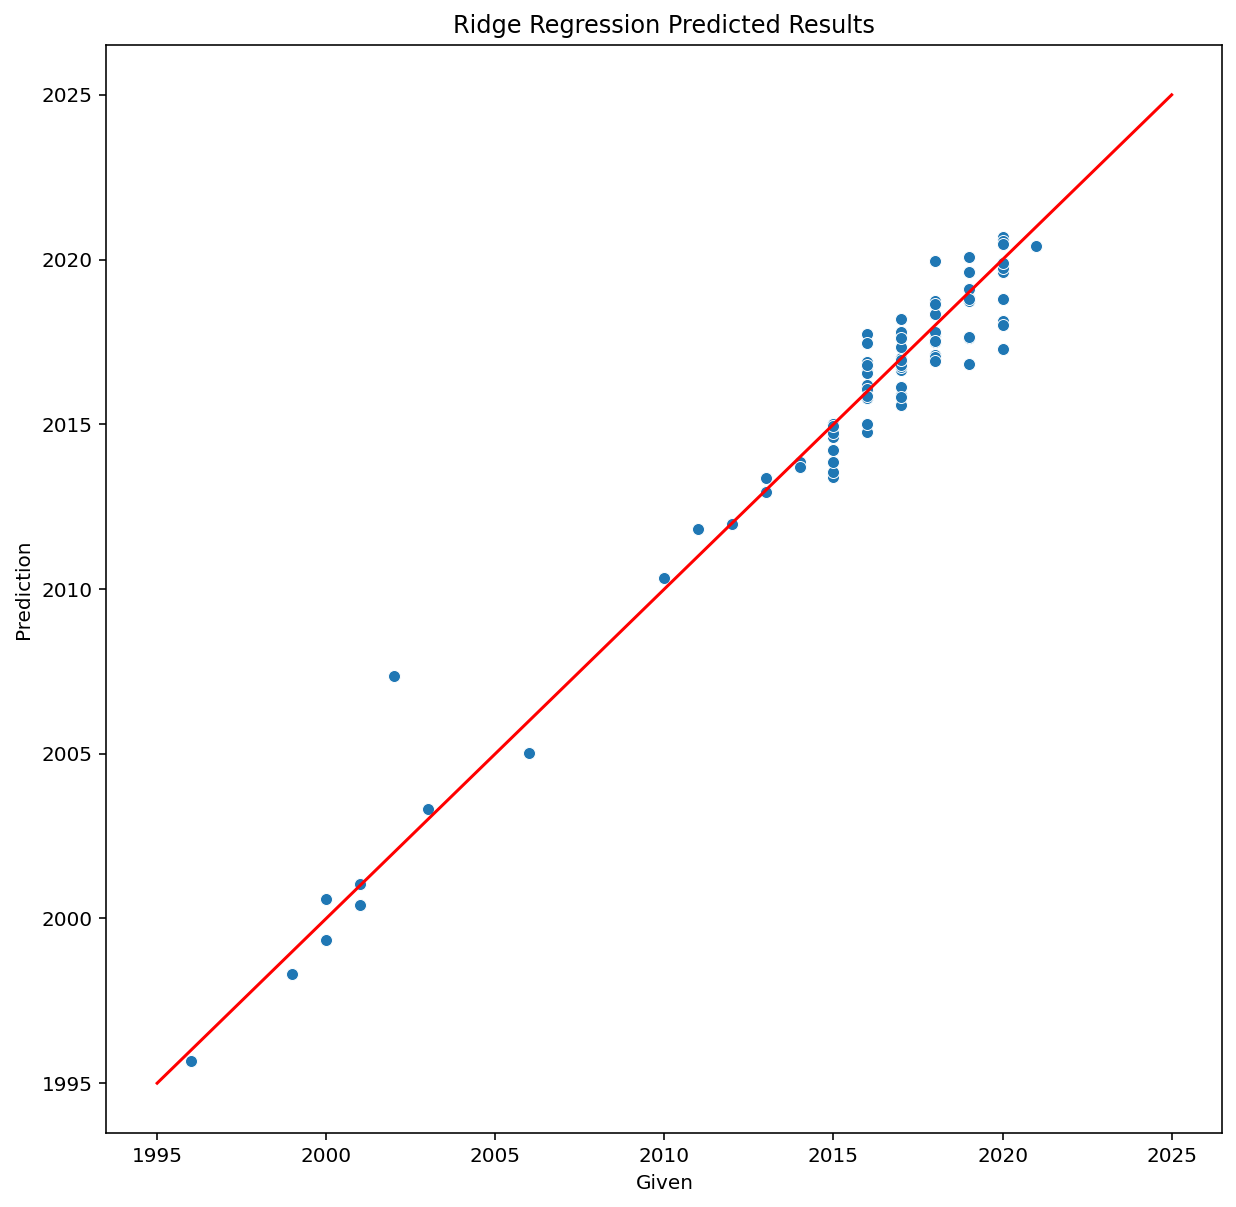

In [101]:
# plot the model
plt.figure(figsize=(10,10))
plot = sns.scatterplot(y_val, ridge_pred);
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(1995,2025,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.title("Ridge Regression Predicted Results");
#plt.savefig("../image/LrPredicted.jpg",dpi=300,bbox_inches='tight')

<AxesSubplot:title={'center':'Ridge Regression Coef Values'}>

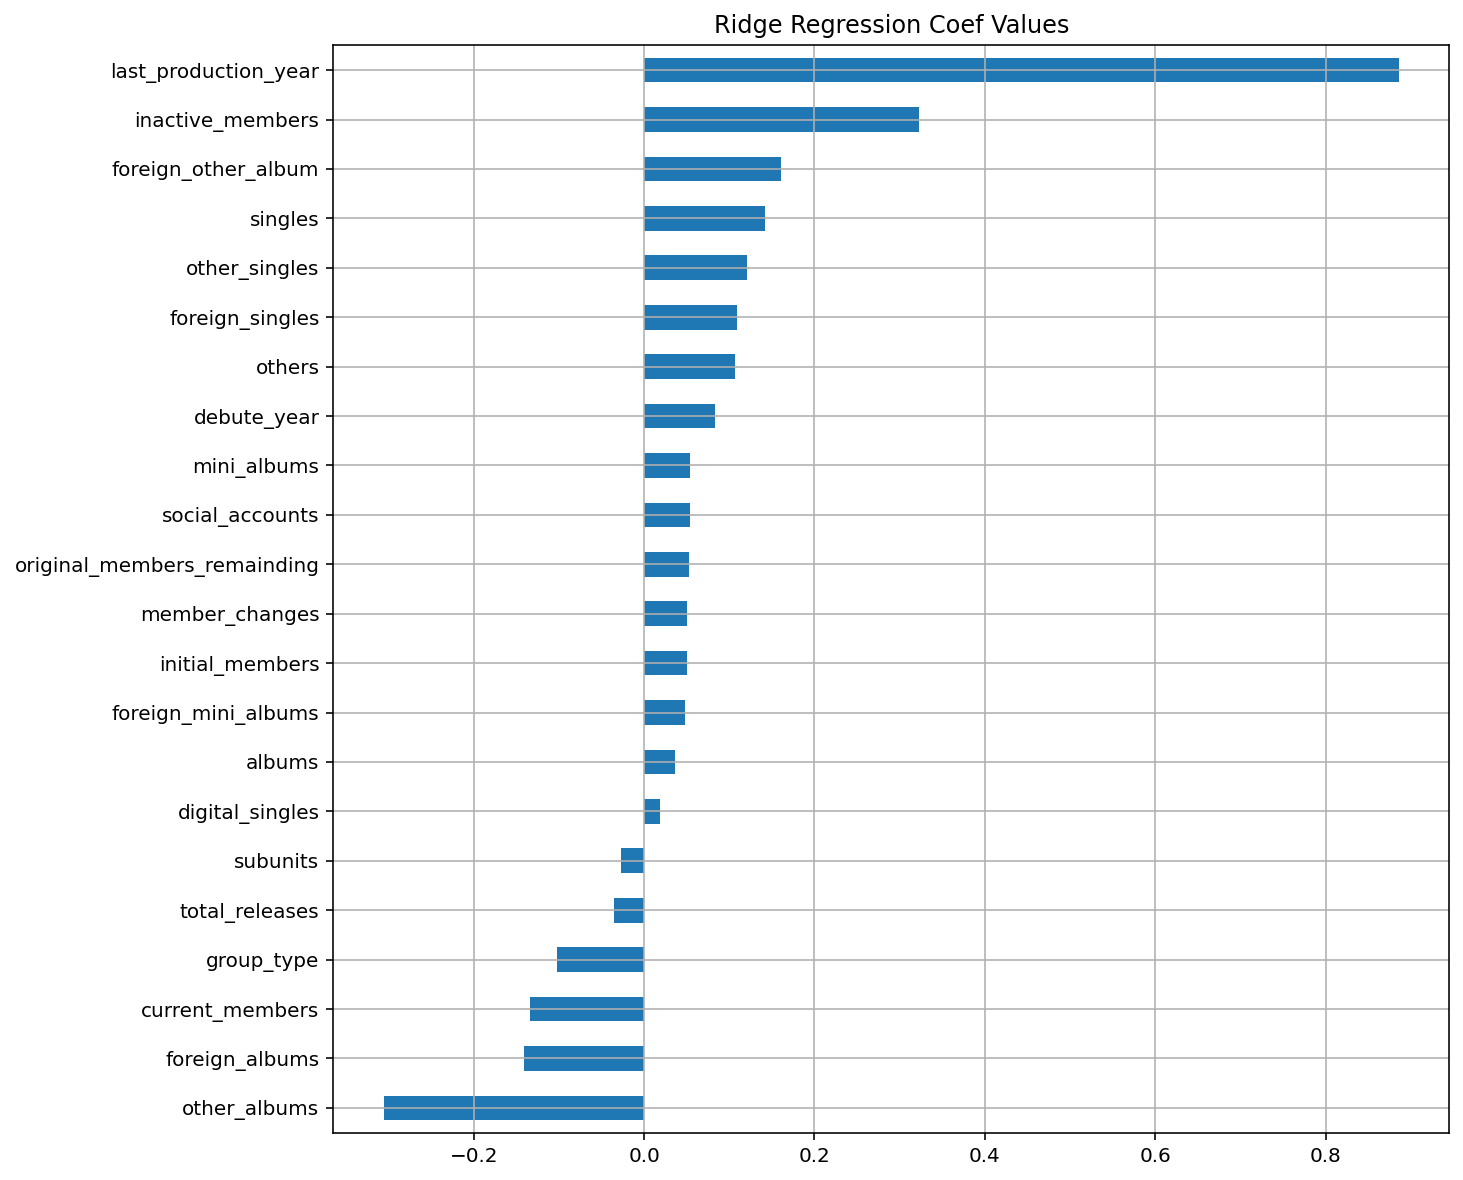

In [105]:
features = X.columns
coef = pd.Series(ridge_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='Ridge Regression Coef Values',figsize=(10,10), grid = True)
#plt.savefig("../",dpi=300,bbox_inches='tight')

### 4.6 ElasticNet Regression

In [145]:
# Set up a list of alphas to check.
enet_alphas = np.logspace(-5, 5, 1000)
# Set up our l1 ratio.
enet_ratio = 0.4
# Instantiate model.
enet_cv = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
# Fit model using optimal alpha.
enet_cv = enet_cv.fit(X_train, y_train)

In [146]:
# Here is the optimal value of alpha
enet_cv.alpha_

0.05939826693920356

In [147]:
# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_val, y_val))

0.9628355722681836
0.963234730874583


In [148]:
# Generate predictions.
enet_pred = enet_cv.predict(X_val)

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


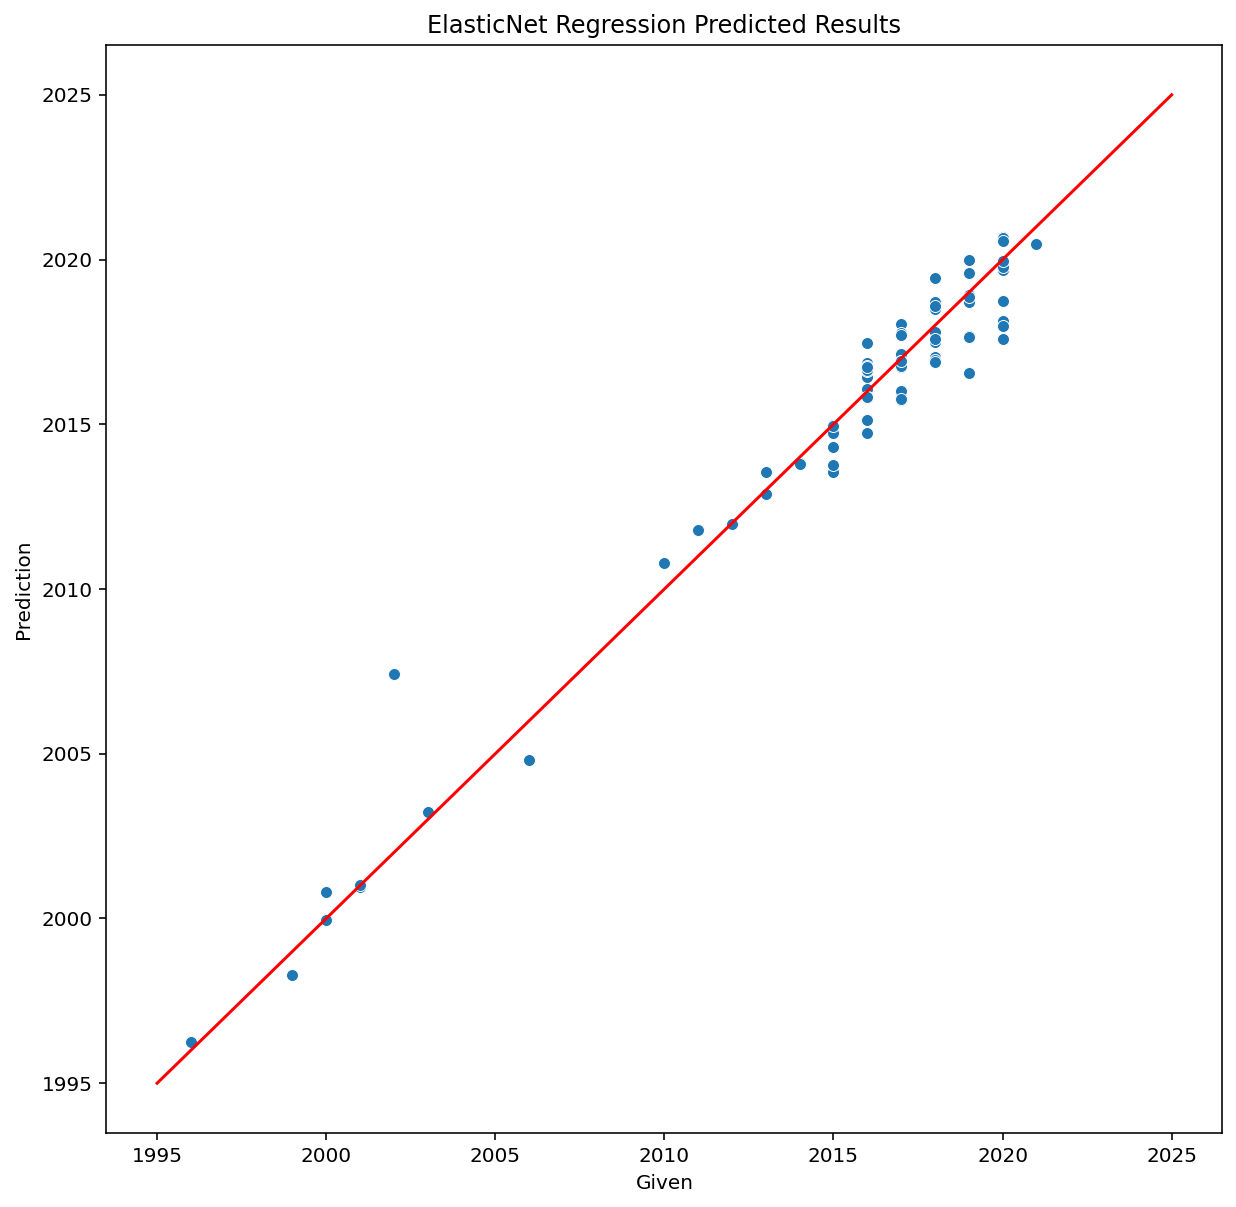

In [149]:
# plot the model
plt.figure(figsize=(10,10))
plot = sns.scatterplot(y_val, enet_pred);
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(1995,2025,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.title("ElasticNet Regression Predicted Results");
#plt.savefig("../image/LrPredicted.jpg",dpi=300,bbox_inches='tight')

<AxesSubplot:title={'center':'ElasticNet Regression Coef Values'}>

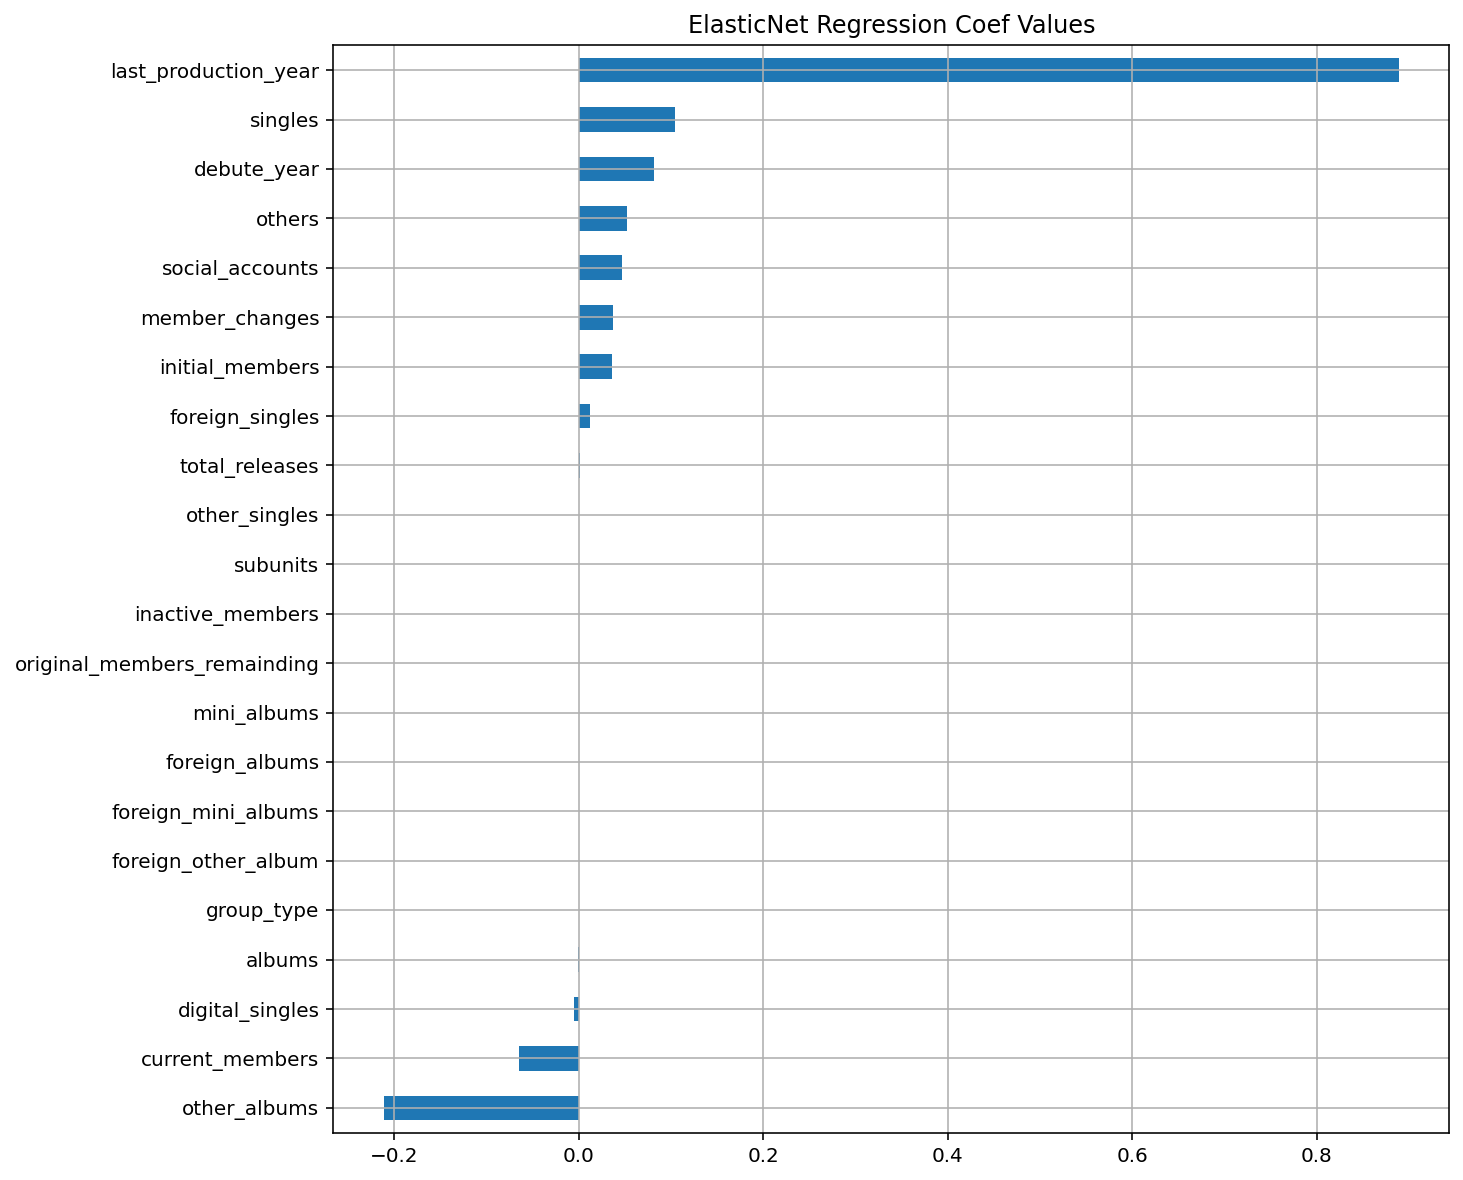

In [150]:
features = X.columns
coef = pd.Series(enet_cv.coef_,features).sort_values()
coef.plot(kind='barh', title='ElasticNet Regression Coef Values',figsize=(10,10), grid = True)
#plt.savefig("../",dpi=300,bbox_inches='tight')

### Model Evaluation

**Summary Table: Model Evaluation**

| Model| Model Best Score|Training Score (Accuracy)       |   Testing Score (Accuracy)   | Sensitivity |  Specificity  | Precision | F1 score | ROC AUC score |
|:-------------------:|:-------------------:|:-------:|:----------:|:-----------------:|:----------------:|:-----------------:|:-----------------:|:-----------------:|
| Null |  0.50 |    0.50  |     0.50    |       NA      |      NA   |NA|NA|NA
|Lasso regression| 0.94 |  0.94  | 0.94 |   0.93  | 0.95   |0.94|0.94|0.98

The evaluation for model performance.

**1. Null Model** 

In our modeling, logistic regression has a score of 0.94 in comparison with the null model which is 0.5, thus, the model have some predictor value.


**2. Logistic Regression**

In our modeling, the logistic regression have a training and testing score of 0.94, which indicates that 94% of the variability of the presence of west nile virus can be explained by the x predictors in our model. The model has a sensitivity of 0.93 and specificity of 0.95, which means the model is able to correctly predict 93% of the samples for true positives and 95% of the samples for true negatives. The model has a precision of 0.94 in accurately correctly identifying the presence of west nile virus. As our team explores to reduce the transmission rate and reduce the wastage of resources, F1 score will be evaluated as the model's success to identify the presence of west nile virus in a given location, time and species that takes into account the false positive and false negative. In this model, the F1 score is 0.94. This model has a receiver operating characteristics (ROC) area under the curve(AUC) score of 0.98, which indicates the performance of the model in separating the two categories of west nile virus absence and presence.

### 4.6. Summary

* Logistic regression have an acccuracy of 0.94, which indicates that 94% of the variability of the presence of west nile virus can be explained by the x predictors in our model
* The model is able to correctly predict 93% of the samples for true positives and 95% of the samples for true negatives with a precision of 94% in accurately correctly identifying the presence of west nile virus. 
* This model has a performance of 98% in separating the two categories of west nile virus absence and presence.